<a href="https://colab.research.google.com/github/Jaredabera/2018-10-08-SWC-MTU/blob/gh-pages/Restaurant_Visitor_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#load data
air_visit_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_mid_term_programming/air_visit_data.csv')
air_store_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_mid_term_programming/air_store_info.csv')
hpg_store_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_mid_term_programming/hpg_store_info.csv')
air_reserve = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_mid_term_programming/air_reserve.csv')
hpg_reserve = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_mid_term_programming/hpg_reserve.csv')
store_id_relation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_mid_term_programming/store_id_relation.csv')
date_info = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_mid_term_programming/date_info.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#hpg_reserve merge hpg_store_info
air_mixed_df = pd.merge(air_reserve, air_store_info)
print("air_reserve lenth: ", len(air_reserve))
print("air_mixed : ", len(air_mixed_df))
air_mixed_df.head()

air_reserve lenth:  92378
air_mixed :  92378


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [6]:
#hpg_reserve merge hpg_store_info
hpg_mixed_df = pd.merge(hpg_reserve, hpg_store_info)
print("hpg_reserve lenth: ", len(hpg_reserve))
print("hpg_mixed : ", len(hpg_mixed_df))
hpg_mixed_df.head()

hpg_reserve lenth:  2000320
hpg_mixed :  871308


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698
3,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698
4,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698


In [7]:
#hpg relation to air
# hpg_mixed_df
hpg_reserve_relat=pd.merge(hpg_mixed_df,store_id_relation,on="hpg_store_id")
hpg_reserve_relat=hpg_reserve_relat.drop(["hpg_store_id"],axis=1)
hpg_reserve_relat

,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id
0,2016-01-01 19:00:00,2016-01-01 15:00:00,4,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
1,2016-01-02 19:00:00,2016-01-02 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
2,2016-01-03 18:00:00,2016-01-02 20:00:00,6,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
3,2016-01-06 20:00:00,2016-01-04 22:00:00,3,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
4,2016-01-11 18:00:00,2016-01-11 14:00:00,2,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,air_db80363d35f10926
...,...,...,...,...,...,...,...,...
13523,2017-04-01 21:00:00,2017-03-10 20:00:00,2,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7
13524,2017-04-02 17:00:00,2017-04-02 14:00:00,2,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7
13525,2017-04-08 19:00:00,2017-04-03 12:00:00,3,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7
13526,2017-04-08 20:00:00,2017-03-09 07:00:00,4,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,air_84f6876ff7e83ae7


In [8]:
#concat air_mixed_df and hpg_mixed_df
air_mixed_new_columns_df = air_mixed_df.rename(columns = {"air_store_id":"id", "air_genre_name":"genre", "air_area_name": "area_name"}, inplace = False)
hpg_mixed_new_columns_df = hpg_reserve_relat.rename(columns = {"air_store_id":"id", "hpg_genre_name":"genre", "hpg_area_name": "area_name"}, inplace = False)
mixed_df = pd.concat([air_mixed_new_columns_df, hpg_mixed_new_columns_df])
mixed_df

,id,visit_datetime,reserve_datetime,reserve_visitors,genre,area_name,latitude,longitude
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
...,...,...,...,...,...,...,...,...
13523,air_84f6876ff7e83ae7,2017-04-01 21:00:00,2017-03-10 20:00:00,2,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462
13524,air_84f6876ff7e83ae7,2017-04-02 17:00:00,2017-04-02 14:00:00,2,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462
13525,air_84f6876ff7e83ae7,2017-04-08 19:00:00,2017-04-03 12:00:00,3,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462
13526,air_84f6876ff7e83ae7,2017-04-08 20:00:00,2017-03-09 07:00:00,4,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462


In [9]:
# date_transform
mixed_df_date_tranform= mixed_df.copy()
mixed_df_date_tranform['visit_date'] =mixed_df_date_tranform['visit_datetime'].str.slice(start=0, stop=10)
mixed_df_date_tranform

,id,visit_datetime,reserve_datetime,reserve_visitors,genre,area_name,latitude,longitude,visit_date
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-01
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-01
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-02
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-02
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2016-01-08
...,...,...,...,...,...,...,...,...,...
13523,air_84f6876ff7e83ae7,2017-04-01 21:00:00,2017-03-10 20:00:00,2,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,2017-04-01
13524,air_84f6876ff7e83ae7,2017-04-02 17:00:00,2017-04-02 14:00:00,2,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,2017-04-02
13525,air_84f6876ff7e83ae7,2017-04-08 19:00:00,2017-04-03 12:00:00,3,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,2017-04-08
13526,air_84f6876ff7e83ae7,2017-04-08 20:00:00,2017-03-09 07:00:00,4,Japanese cuisine/Kaiseki,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.589336,130.418462,2017-04-08


In [10]:
#sum reserve_visitors
sum_df = mixed_df_date_tranform.groupby(by=['visit_date', 'id', 'genre', 'area_name', 'latitude','longitude'], as_index=False).sum()
sum_df


<ipython-input-10-e062e82294e4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_df = mixed_df_date_tranform.groupby(by=['visit_date', 'id', 'genre', 'area_name', 'latitude','longitude'], as_index=False).sum()


,visit_date,id,genre,area_name,latitude,longitude,reserve_visitors
0,2016-01-01,air_08cb3c4ee6cd6a22,Japanese style,Hyōgo-ken Kakogawa-shi Noguchichō Yoshino,34.752826,134.847642,2
1,2016-01-01,air_877f79706adbfb06,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,3
2,2016-01-01,air_db4b38ebe7a7ceff,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,9
3,2016-01-01,air_db80363d35f10926,Dining bar,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,5
4,2016-01-01,air_db80363d35f10926,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,4
...,...,...,...,...,...,...,...
38702,2017-05-29,air_db4b38ebe7a7ceff,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,6
38703,2017-05-30,air_1033310359ceeac1,Izakaya,Tōkyō-to Kōtō-ku Tomioka,35.671270,139.796987,8
38704,2017-05-31,air_3cad29d1a23209d2,Japanese food,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,3
38705,2017-05-31,air_877f79706adbfb06,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,3


In [11]:
# holiday flag
with_day_df = pd.merge(sum_df, date_info, left_on='visit_date', right_on='calendar_date')
with_day_df = with_day_df.drop(['calendar_date'], axis=1)
with_day_df

,visit_date,id,genre,area_name,latitude,longitude,reserve_visitors,day_of_week,holiday_flg
0,2016-01-01,air_08cb3c4ee6cd6a22,Japanese style,Hyōgo-ken Kakogawa-shi Noguchichō Yoshino,34.752826,134.847642,2,Friday,1
1,2016-01-01,air_877f79706adbfb06,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,3,Friday,1
2,2016-01-01,air_db4b38ebe7a7ceff,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,9,Friday,1
3,2016-01-01,air_db80363d35f10926,Dining bar,Hokkaidō Asahikawa-shi 6 Jōdōri,43.770635,142.364819,5,Friday,1
4,2016-01-01,air_db80363d35f10926,Seafood,Hokkaidō Asahikawa-shi 3 Jōdōri,43.768033,142.359664,4,Friday,1
...,...,...,...,...,...,...,...,...,...
38702,2017-05-29,air_db4b38ebe7a7ceff,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,34.676231,135.486059,6,Monday,0
38703,2017-05-30,air_1033310359ceeac1,Izakaya,Tōkyō-to Kōtō-ku Tomioka,35.671270,139.796987,8,Tuesday,0
38704,2017-05-31,air_3cad29d1a23209d2,Japanese food,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051,3,Wednesday,0
38705,2017-05-31,air_877f79706adbfb06,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,3,Wednesday,0


In [12]:
#merge  with_day_df and air_visit_data
with_day_visitor_df = pd.merge(air_visit_data, with_day_df, left_on=['air_store_id', 'visit_date'], right_on=['id','visit_date'])
with_day_visitor_df = with_day_visitor_df.drop(['id'], axis='columns')
with_day_visitor_df

,air_store_id,visit_date,visitors,genre,area_name,latitude,longitude,reserve_visitors,day_of_week,holiday_flg
0,air_35512c42db0868da,2016-02-27,6,Dining bar,Tōkyō-to Musashino-shi Midorichō,35.717784,139.566260,12,Saturday,0
1,air_ee3a01f0c71a769f,2016-01-04,61,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,2,Monday,0
2,air_ee3a01f0c71a769f,2016-01-08,21,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,3,Friday,0
3,air_ee3a01f0c71a769f,2016-01-09,57,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,25,Saturday,0
4,air_ee3a01f0c71a769f,2016-01-10,32,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,5,Sunday,0
...,...,...,...,...,...,...,...,...,...,...
34626,air_754ae581ad80cc9f,2017-04-15,39,Izakaya,Niigata-ken Niigata-shi Teraohigashi,37.874223,138.971940,20,Saturday,0
34627,air_754ae581ad80cc9f,2017-04-19,6,International cuisine,Niigata-ken Niigata-shi Sakaihigashi,37.869730,138.971623,6,Wednesday,0
34628,air_754ae581ad80cc9f,2017-04-19,6,Izakaya,Niigata-ken Niigata-shi Teraohigashi,37.874223,138.971940,6,Wednesday,0
34629,air_754ae581ad80cc9f,2017-04-22,47,Izakaya,Niigata-ken Niigata-shi Teraohigashi,37.874223,138.971940,28,Saturday,0


In [13]:
# FILE LOADING
file_df = with_day_visitor_df.copy()
target_name = 'visitors'
no_need_features = ['air_store_id', 'visit_date']
category_features = ['genre', 'area_name', 'day_of_week', 'holiday_flg']

In [14]:
# SETTING X AND Y
file_df.drop(no_need_features, axis=1, inplace=True)
y_target = file_df[target_name]
X_features = file_df.drop([target_name],axis=1,inplace=False)

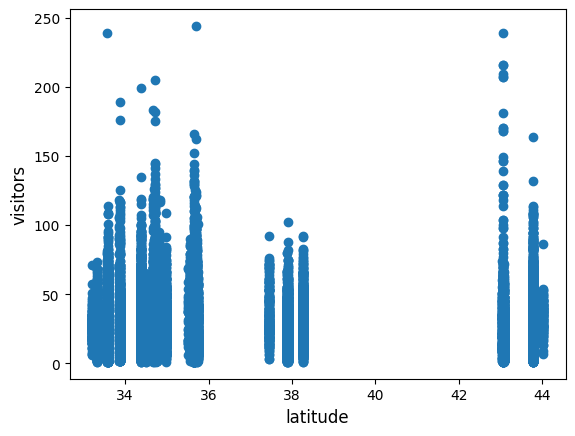

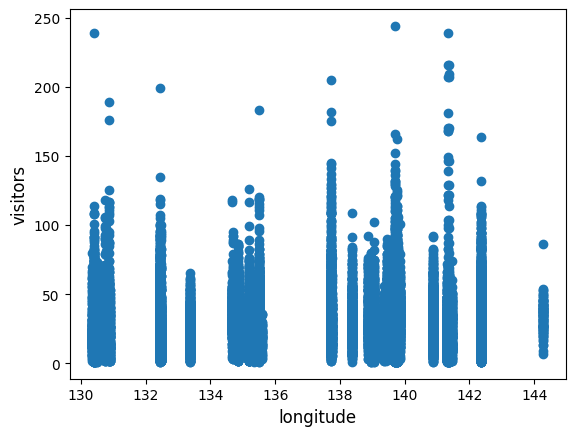

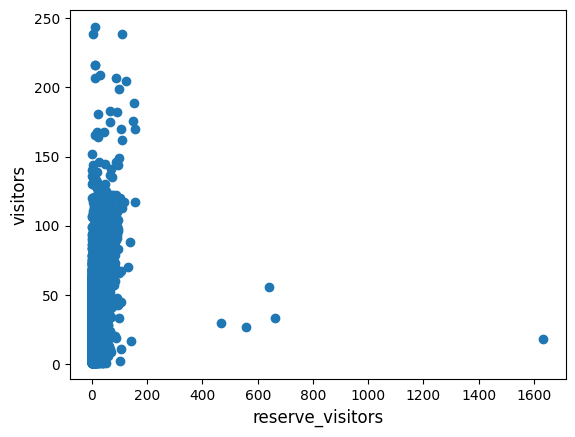

In [15]:
# INDENTIFYING POSSIBLE OUTLIERS USING VISUALIZATION GRAPH
for feature in X_features.drop(category_features, axis=1, inplace=False):
    plt.scatter(x = file_df[feature], y = y_target)
    plt.ylabel(target_name, fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.show()

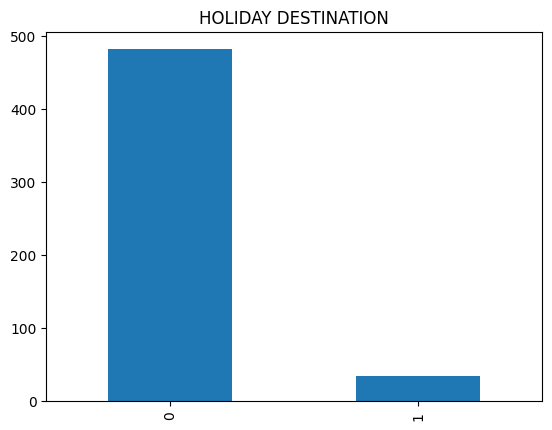

In [16]:
# PLOTTING FOR THE TWO FLAGS AND CHECK DISPERSION
date_info["holiday_flg"].value_counts().plot(kind="bar")
plt.title("HOLIDAY DESTINATION")
plt.show()

In [17]:
date_info["holiday_flg"].value_counts(normalize=True)

0    0.932302
1    0.067698
Name: holiday_flg, dtype: float64

TOP 5 IMPORTANT FEATURES

In [18]:
def daysToPrev25th(row):
  TARGET_DATE = 25
  if row['dayofmonth'] >= 25: 	return row['dayofmonth'] - TARGET_DATE
  else:
    return row['daysinPrevmonth'] - TARGET_DATE + row['dayofmonth']
    air_visit["dayofmonth"] = air_visit["visit_date"].dt.day      
    air_visit["daysinPrevmonth"] = (air_visit["visit_date"] - pd.DateOffset(months=1)).dt.daysinmonth
    air_visit["daysToPrev25th"] = air_visit.apply(lambda row:daysToPrev25th(row), axis=1)


In [19]:
#REMOVE OUTLIERS IDENTIFIED ON THE PREVIOUS SCATTER GRAPH
outlier_name = 'reserve_visitors'
cond1 = file_df[outlier_name] > 400
outlier_index = X_features[cond1].index
print(outlier_index)
print('X_feature shape before Outlier is removed:', X_features.shape)
X_features.drop(outlier_index , axis=0, inplace=True)
y_target.drop(outlier_index, axis=0, inplace=True)
print('X_feature shape after Outlier is removed:', X_features.shape)
X_features

Int64Index([3470, 3471, 3472, 3473, 16402], dtype='int64')
X_feature shape before Outlier is removed: (34631, 7)
X_feature shape after Outlier is removed: (34626, 7)


,genre,area_name,latitude,longitude,reserve_visitors,day_of_week,holiday_flg
0,Dining bar,Tōkyō-to Musashino-shi Midorichō,35.717784,139.566260,12,Saturday,0
1,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,2,Monday,0
2,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,3,Friday,0
3,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,25,Saturday,0
4,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,5,Sunday,0
...,...,...,...,...,...,...,...
34626,Izakaya,Niigata-ken Niigata-shi Teraohigashi,37.874223,138.971940,20,Saturday,0
34627,International cuisine,Niigata-ken Niigata-shi Sakaihigashi,37.869730,138.971623,6,Wednesday,0
34628,Izakaya,Niigata-ken Niigata-shi Teraohigashi,37.874223,138.971940,6,Wednesday,0
34629,Izakaya,Niigata-ken Niigata-shi Teraohigashi,37.874223,138.971940,28,Saturday,0


In [20]:
#CALCULATE DATA SKEW > 1 THEN SCALE DOWN
from scipy.stats import skew
non_category_features_index = X_features.drop(category_features, axis=1, inplace=False).dtypes.index
skew_features = X_features[non_category_features_index].apply(lambda x : skew(x))
print(skew_features.sort_values(ascending=False))

skew_features_need_change = skew_features[skew_features > 1]
X_features[skew_features_need_change.index] = np.log1p(X_features[skew_features_need_change.index])
X_features


reserve_visitors    2.278841
latitude            1.706908
longitude          -0.563896
dtype: float64


,genre,area_name,latitude,longitude,reserve_visitors,day_of_week,holiday_flg
0,Dining bar,Tōkyō-to Musashino-shi Midorichō,3.603261,139.566260,2.564949,Saturday,0
1,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,3.575456,137.725940,1.098612,Monday,0
2,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,3.575456,137.725940,1.386294,Friday,0
3,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,3.575456,137.725940,3.258097,Saturday,0
4,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,3.575456,137.725940,1.791759,Sunday,0
...,...,...,...,...,...,...,...
34626,Izakaya,Niigata-ken Niigata-shi Teraohigashi,3.660331,138.971940,3.044522,Saturday,0
34627,International cuisine,Niigata-ken Niigata-shi Sakaihigashi,3.660216,138.971623,1.945910,Wednesday,0
34628,Izakaya,Niigata-ken Niigata-shi Teraohigashi,3.660331,138.971940,1.945910,Wednesday,0
34629,Izakaya,Niigata-ken Niigata-shi Teraohigashi,3.660331,138.971940,3.367296,Saturday,0


In [21]:
#APPLY CATEGORY FEATURE AND ONE HOT ENCODING 
single_df = pd.get_dummies(X_features, columns=category_features)
single_df

,latitude,longitude,reserve_visitors,genre_Amusement bar,genre_Asian,genre_Bar/Cocktail,genre_Cafe,genre_Cafe/Sweets,genre_Creation,genre_Creative Japanese food,...,area_name_Ōsaka-fu Ōsaka-shi Ōhiraki,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,holiday_flg_0,holiday_flg_1
0,3.603261,139.566260,2.564949,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,3.575456,137.725940,1.098612,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,3.575456,137.725940,1.386294,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,3.575456,137.725940,3.258097,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,3.575456,137.725940,1.791759,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34626,3.660331,138.971940,3.044522,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
34627,3.660216,138.971623,1.945910,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
34628,3.660331,138.971940,1.945910,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
34629,3.660331,138.971940,3.367296,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
#NORMALIZE THE Y VALUES
y_target_log = np.log1p(y_target)


In [23]:
#COMBINE BOTH DATE AND RENAME TO A SINGLE LABEL
# print(with_day_visitor_df.shape)
single_df['visit_date']=with_day_visitor_df['visit_date'].drop(outlier_index , axis=0, inplace=False)
single_df['air_store_id']=with_day_visitor_df['air_store_id'].drop(outlier_index , axis=0, inplace=False)
single_df

,latitude,longitude,reserve_visitors,genre_Amusement bar,genre_Asian,genre_Bar/Cocktail,genre_Cafe,genre_Cafe/Sweets,genre_Creation,genre_Creative Japanese food,...,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,holiday_flg_0,holiday_flg_1,visit_date,air_store_id
0,3.603261,139.566260,2.564949,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,2016-02-27,air_35512c42db0868da
1,3.575456,137.725940,1.098612,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,2016-01-04,air_ee3a01f0c71a769f
2,3.575456,137.725940,1.386294,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,2016-01-08,air_ee3a01f0c71a769f
3,3.575456,137.725940,3.258097,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,2016-01-09,air_ee3a01f0c71a769f
4,3.575456,137.725940,1.791759,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,2016-01-10,air_ee3a01f0c71a769f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34626,3.660331,138.971940,3.044522,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,2017-04-15,air_754ae581ad80cc9f
34627,3.660216,138.971623,1.945910,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,2017-04-19,air_754ae581ad80cc9f
34628,3.660331,138.971940,1.945910,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,2017-04-19,air_754ae581ad80cc9f
34629,3.660331,138.971940,3.367296,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,2017-04-22,air_754ae581ad80cc9f


In [24]:
import datetime
# merge X and Y
final_data=pd.merge(single_df,air_visit_data,on=["visit_date","air_store_id"])
# final_data date_process
dt = datetime.datetime(2016, 1, 1, 0, 0, 0)
timestamp_2016 = dt.timestamp()
dt = datetime.datetime(2017, 1, 1, 0, 0, 0)
timestamp_2017 = dt.timestamp()
final_data["visit_date"]=pd.to_datetime(final_data["visit_date"])
train_data=final_data[final_data["visit_date"].dt.year==2016]
train_data["visit_date"]=(train_data["visit_date"].map(lambda x: x.value)-timestamp_2016)/10**18
test_data=final_data[final_data["visit_date"].dt.year==2017]
test_data["visit_date"]=(test_data["visit_date"].map(lambda x: x.value)/timestamp_2017)/10**18

<ipython-input-24-dff92bc82d9e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["visit_date"]=(train_data["visit_date"].map(lambda x: x.value)-timestamp_2016)/10**18
<ipython-input-24-dff92bc82d9e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["visit_date"]=(test_data["visit_date"].map(lambda x: x.value)/timestamp_2017)/10**18


In [25]:
#split X and y
train_x=train_data.drop(["air_store_id","visitors"],axis=1,inplace=False)
train_y=train_data["visitors"]
test_x=test_data.drop(["air_store_id","visitors"],axis=1,inplace=False)
test_y=test_data["visitors"]

In [26]:
# data shape
train_x=np.array(train_x)
print("train_x.shape",train_x.shape)
train_y=np.array(train_y)
train_y=train_y.reshape((len(train_y),1))
print("train_y.shape",train_y.shape)
test_x=np.array(test_x)
print("test_x.shape",test_x.shape)
test_y=np.array(test_y)
test_y=test_y.reshape((len(test_y),1))
print("test_y.shape",test_y.shape)

train_x.shape (18261, 142)
train_y.shape (18261, 1)
test_x.shape (16365, 142)
test_y.shape (16365, 1)


In [27]:
import tensorflow as tf
from keras import backend as K
# create model
model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(142,)),
  tf.keras.layers.Dense(142),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(32,activation='relu'),
  tf.keras.layers.Dense(16,activation='relu'),
  tf.keras.layers.Dense(1,activation='relu')])

def root_mean_squared_log_error(y_true, y_pred):
    msle=tf.keras.losses.MeanSquaredLogarithmicError()
    return K.sqrt(msle(y_true,y_pred)) 
#configure optimize, loss, metrics 
model.compile(optimizer='Adam',
       loss=root_mean_squared_log_error,
       metrics=[root_mean_squared_log_error])


In [28]:
#train model
model.fit(train_x,train_y,epochs=10)

Epoch 1/10
571/571 [==============================] - 3s 2ms/step - loss: 0.6636 - root_mean_squared_log_error: 0.6637
Epoch 2/10
571/571 [==============================] - 1s 2ms/step - loss: 0.5396 - root_mean_squared_log_error: 0.5397
Epoch 3/10
571/571 [==============================] - 1s 2ms/step - loss: 0.5264 - root_mean_squared_log_error: 0.5265
Epoch 4/10
571/571 [==============================] - 1s 2ms/step - loss: 0.5222 - root_mean_squared_log_error: 0.5222
Epoch 5/10
571/571 [==============================] - 1s 2ms/step - loss: 0.5214 - root_mean_squared_log_error: 0.5215
Epoch 6/10
571/571 [==============================] - 1s 2ms/step - loss: 0.5179 - root_mean_squared_log_error: 0.5180
Epoch 7/10
571/571 [==============================] - 2s 4ms/step - loss: 0.5154 - root_mean_squared_log_error: 0.5155
Epoch 8/10
571/571 [==============================] - 2s 4ms/step - loss: 0.5147 - root_mean_squared_log_error: 0.5146
Epoch 9/10
571/571 [============================

In [29]:
#predict
evaluate=model.evaluate(test_x,test_y)
predict=model.predict(test_x)
print(predict.shape)

512/512 [==============================] - 1s 2ms/step
(16365, 1)


In [30]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 142)               20306     
                                                                 
 dense_1 (Dense)             (None, 64)                9152      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 32,083
Trainable params: 32,083
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
for pre, tst in zip(predict, test_y):
    print(pre, tst)

Streaming output truncated to the last 5000 lines.
[12.918338] [8]
[25.526243] [14]
[36.888325] [39]
[28.956167] [25]
[34.07886] [23]
[12.716401] [11]
[30.36521] [31]
[26.654736] [19]
[29.41963] [28]
[36.768494] [36]
[18.1747] [29]
[25.81576] [30]
[20.388998] [15]
[15.784663] [21]
[24.264698] [30]
[13.083321] [16]
[25.52411] [34]
[21.532036] [12]
[23.208794] [17]
[30.258604] [23]
[13.083321] [23]
[37.291077] [31]
[34.305294] [30]
[18.39163] [33]
[38.7213] [45]
[36.88832] [28]
[19.880968] [21]
[23.208794] [30]
[21.9955] [22]
[28.215878] [40]
[25.860323] [17]
[24.223806] [24]
[24.264698] [31]
[32.154488] [34]
[29.464197] [23]
[26.619677] [19]
[21.9955] [19]
[28.215878] [33]
[32.22703] [30]
[26.619677] [30]
[25.81576] [22]
[36.219105] [35]
[34.962814] [20]
[21.246294] [9]
[14.413409] [8]
[27.756182] [9]
[30.567781] [8]
[27.493147] [17]
[43.95718] [43]
[14.196479] [4]
[23.938063] [7]
[30.523214] [15]
[30.566301] [21]
[41.51043] [38]
[34.917267] [26]
[16.339985] [6]
[16.586517] [6]
[21.2462

In [31]:
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad
from keras.layers import Dense, Dropout
model_dropout = tf.keras.models.Sequential([
  tf.keras.Input(shape=(142,)),
  tf.keras.layers.Dense(142),
  Dropout(0.1),
  tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  Dropout(0.1),
  tf.keras.layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  Dropout(0.1),
  tf.keras.layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  Dropout(0.1),
  tf.keras.layers.Dense(1,activation='relu') ,
])
#configure optimizer、loss、metrics 
def root_mean_squared_log_error(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError()
    return K.sqrt(msle(y_true, y_pred)) 
model_dropout.compile(optimizer='Adam',
       loss=root_mean_squared_log_error,
       metrics=[root_mean_squared_log_error])
#train model
model_dropout.fit(train_x,train_y,epochs=10)

Epoch 1/10
571/571 [==============================] - 3s 3ms/step - loss: 1.7012 - root_mean_squared_log_error: 1.5066
Epoch 2/10
571/571 [==============================] - 2s 3ms/step - loss: 0.6854 - root_mean_squared_log_error: 0.6526
Epoch 3/10
571/571 [==============================] - 2s 4ms/step - loss: 0.6081 - root_mean_squared_log_error: 0.5736
Epoch 4/10
571/571 [==============================] - 2s 4ms/step - loss: 0.5945 - root_mean_squared_log_error: 0.5634
Epoch 5/10
571/571 [==============================] - 3s 4ms/step - loss: 0.5871 - root_mean_squared_log_error: 0.5587
Epoch 6/10
571/571 [==============================] - 2s 3ms/step - loss: 0.5789 - root_mean_squared_log_error: 0.5525
Epoch 7/10
571/571 [==============================] - 2s 3ms/step - loss: 0.5770 - root_mean_squared_log_error: 0.5520
Epoch 8/10
571/571 [==============================] - 2s 3ms/step - loss: 0.5698 - root_mean_squared_log_error: 0.5461
Epoch 9/10
571/571 [============================

In [32]:
#predict
evaluate=model_dropout.evaluate(test_x,test_y)
predict=model_dropout.predict(test_x)
print(predict.shape)

512/512 [==============================] - 1s 1ms/step
(16365, 1)


In [33]:
for pre, tst in zip(predict, test_y):
    print(pre, tst)

Streaming output truncated to the last 5000 lines.
[12.918338] [8]
[25.526243] [14]
[36.888325] [39]
[28.956167] [25]
[34.07886] [23]
[12.716401] [11]
[30.36521] [31]
[26.654736] [19]
[29.41963] [28]
[36.768494] [36]
[18.1747] [29]
[25.81576] [30]
[20.388998] [15]
[15.784663] [21]
[24.264698] [30]
[13.083321] [16]
[25.52411] [34]
[21.532036] [12]
[23.208794] [17]
[30.258604] [23]
[13.083321] [23]
[37.291077] [31]
[34.305294] [30]
[18.39163] [33]
[38.7213] [45]
[36.88832] [28]
[19.880968] [21]
[23.208794] [30]
[21.9955] [22]
[28.215878] [40]
[25.860323] [17]
[24.223806] [24]
[24.264698] [31]
[32.154488] [34]
[29.464197] [23]
[26.619677] [19]
[21.9955] [19]
[28.215878] [33]
[32.22703] [30]
[26.619677] [30]
[25.81576] [22]
[36.219105] [35]
[34.962814] [20]
[21.246294] [9]
[14.413409] [8]
[27.756182] [9]
[30.567781] [8]
[27.493147] [17]
[43.95718] [43]
[14.196479] [4]
[23.938063] [7]
[30.523214] [15]
[30.566301] [21]
[41.51043] [38]
[34.917267] [26]
[16.339985] [6]
[16.586517] [6]
[21.2462

In [35]:
# Create a model with L1 regularization
from tensorflow.keras import regularizers
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='relu'))
# compile the model with MSLE loss function and SGD optimizer
model.compile(loss='mean_squared_logarithmic_error', optimizer=SGD(lr=0.01, momentum=0.9))


In [36]:

# train the model with 50 epochs, 32 batch size, and validation data
model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y))

Epoch 1/10
571/571 [==============================] - 2s 3ms/step - loss: 0.8889 - val_loss: 0.5865
Epoch 2/10
571/571 [==============================] - 2s 3ms/step - loss: 0.5642 - val_loss: 0.5283
Epoch 3/10
571/571 [==============================] - 3s 5ms/step - loss: 0.5265 - val_loss: 0.4925
Epoch 4/10
571/571 [==============================] - 2s 3ms/step - loss: 0.5234 - val_loss: 0.4951
Epoch 5/10
571/571 [==============================] - 2s 3ms/step - loss: 0.5308 - val_loss: 0.4956
Epoch 6/10
571/571 [==============================] - 2s 3ms/step - loss: 0.5293 - val_loss: 0.4958
Epoch 7/10
571/571 [==============================] - 2s 3ms/step - loss: 0.5219 - val_loss: 0.5220
Epoch 8/10
571/571 [==============================] - 2s 3ms/step - loss: 0.5237 - val_loss: 0.4919
Epoch 9/10
571/571 [==============================] - 2s 3ms/step - loss: 0.5217 - val_loss: 0.5310
Epoch 10/10
571/571 [==============================] - 2s 4ms/step - loss: 0.5236 - val_loss: 0.5085

In [37]:
#predict
evaluate=model_dropout.evaluate(test_x,test_y)
predict=model_dropout.predict(test_x)
print(predict.shape)

512/512 [==============================] - 1s 2ms/step
(16365, 1)


In [38]:
for pre, tst in zip(predict, test_y):
    print(pre, tst)

Streaming output truncated to the last 5000 lines.
[12.918338] [8]
[25.526243] [14]
[36.888325] [39]
[28.956167] [25]
[34.07886] [23]
[12.716401] [11]
[30.36521] [31]
[26.654736] [19]
[29.41963] [28]
[36.768494] [36]
[18.1747] [29]
[25.81576] [30]
[20.388998] [15]
[15.784663] [21]
[24.264698] [30]
[13.083321] [16]
[25.52411] [34]
[21.532036] [12]
[23.208794] [17]
[30.258604] [23]
[13.083321] [23]
[37.291077] [31]
[34.305294] [30]
[18.39163] [33]
[38.7213] [45]
[36.88832] [28]
[19.880968] [21]
[23.208794] [30]
[21.9955] [22]
[28.215878] [40]
[25.860323] [17]
[24.223806] [24]
[24.264698] [31]
[32.154488] [34]
[29.464197] [23]
[26.619677] [19]
[21.9955] [19]
[28.215878] [33]
[32.22703] [30]
[26.619677] [30]
[25.81576] [22]
[36.219105] [35]
[34.962814] [20]
[21.246294] [9]
[14.413409] [8]
[27.756182] [9]
[30.567781] [8]
[27.493147] [17]
[43.95718] [43]
[14.196479] [4]
[23.938063] [7]
[30.523214] [15]
[30.566301] [21]
[41.51043] [38]
[34.917267] [26]
[16.339985] [6]
[16.586517] [6]
[21.2462

512/512 [==============================] - 1s 1ms/step
MSE with Adam optimizer:  [ 169. 1369. 1600. ...   36.   36. 2209.]
512/512 [==============================] - 1s 1ms/step
MSE with SGD optimizer:  [ 169. 1369. 1600. ...   36.   36. 2209.]
512/512 [==============================] - 1s 2ms/step


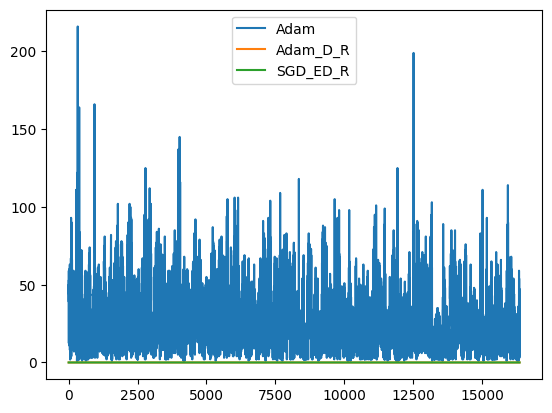

In [44]:
import matplotlib.pyplot as plt

# make predictions on the test data
y_pred_adam = model.predict(test_x)

# evaluate the performance of the model using mean squared error (MSE)
mse_adam = tf.keras.metrics.mean_squared_error(test_y, y_pred_adam).numpy()

# print the MSE for Adam optimizer
print("MSE with Adam optimizer: ", mse_adam)

# make predictions on the test data
y_pred_sgd = model.predict(test_x)

# evaluate the performance of the model using mean squared error (MSE)
mse_sgd = tf.keras.metrics.mean_squared_error(test_y, y_pred_sgd).numpy()

# print the MSE for SGD optimizer
print("MSE with SGD optimizer: ", mse_sgd)

# make predictions on the test data
y_pred_adagrad = model.predict(test_x)

# evaluate the performance of the model using mean squared error (MSE)
mse_adagrad = tf.keras.metrics.mean_squared_error(test_y, y_pred_adagrad).numpy()

# print the MSE for Adagrad optimizer
#print("MSE with Adagrad optimizer: ", mse_adagrad)

# plot the actual and predicted values
plt.plot(test_y, label='Adam')
plt.plot(y_pred_adam, label='Adam_D_R')
plt.plot(y_pred_sgd, label='SGD_ED_R')
#plt.plot(y_pred_adagrad, label='Adagrad')
plt.legend()
plt.show()